In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import upsetplot

In [2]:
file = "C:/Users/Magda/Documents/detect-toxic-comments/data/train.csv"
df = pd.read_csv(file)

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [5]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [67]:
TOXIC_LABELS = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
for col in TOXIC_LABELS:
    print("Labels for %s are: %s" % (col, ', '.join(map(str, df[col].unique()))))

Labels for toxic are: 0, 1
Labels for severe_toxic are: 0, 1
Labels for obscene are: 0, 1
Labels for threat are: 0, 1
Labels for insult are: 0, 1
Labels for identity_hate are: 0, 1


In [78]:
INNOCENT_LABEL = "innocent"
df[INNOCENT_LABEL] = (df[TOXIC_LABELS].sum(axis = 1) == 0).astype(int)
LABELS = TOXIC_LABELS + [INNOCENT_LABEL]

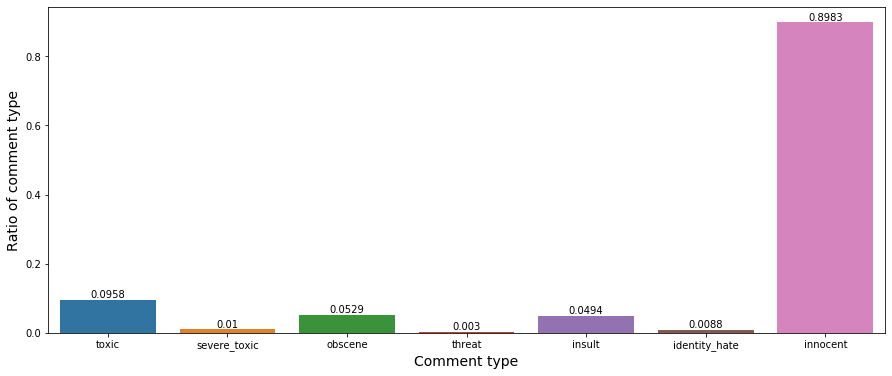

In [69]:
plt.figure(figsize=(15,6))
ratio = df[LABELS].mean()
PRECISION = 1e4
ax = sns.barplot(LABELS, ratio)

plt.xlabel("Comment type", fontsize = 14)
plt.ylabel("Ratio of comment type", fontsize = 14)

for bar, val in zip(ax.patches, ratio):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(val*PRECISION)/PRECISION, ha='center', va='bottom')
    
plt.show()

There are 159571 comments, but 178444 comment labels.


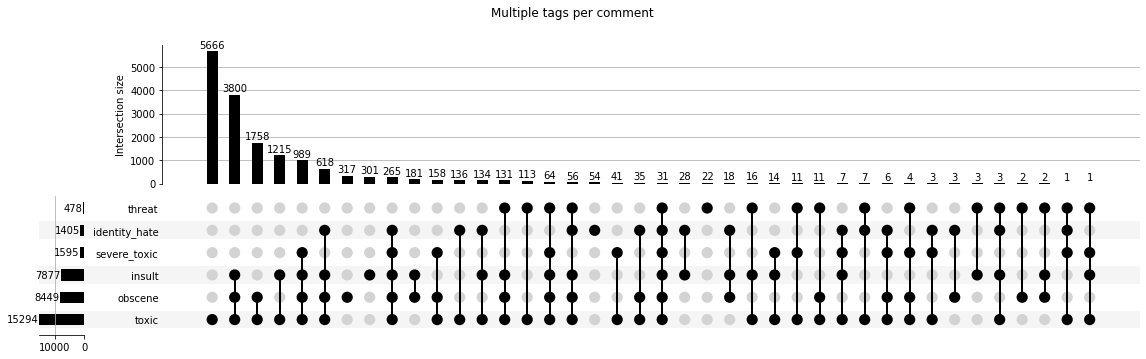

In [106]:
# Multiple labels
print("There are %s comments, but %s comment labels." % (df.shape[0], int(df.shape[0]*ratio.sum())))

UNIQUE_ID = "id"
df_subset = df[TOXIC_LABELS + [UNIQUE_ID]].loc[df[INNOCENT_LABEL] == 0]
counts = df_subset.astype(bool).groupby(TOXIC_LABELS).count()[UNIQUE_ID]
upsetplot.plot(counts, subset_size='sum', show_counts = "%d", sort_by = 'cardinality')
plt.suptitle('Multiple tags per comment')
plt.show()

{'matrix': <matplotlib.axes._subplots.AxesSubplot at 0x27c9b2b8f60>,
 'shading': <matplotlib.axes._subplots.AxesSubplot at 0x27c9b26e9e8>,
 'totals': <matplotlib.axes._subplots.AxesSubplot at 0x27c9b694ef0>,
 'intersections': <matplotlib.axes._subplots.AxesSubplot at 0x27c9b6e8198>}

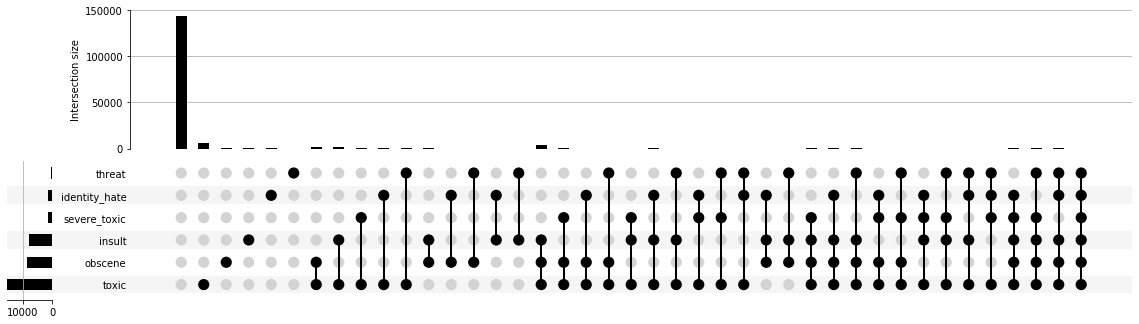

159571

,toxic,severe_toxic,obscene,threat,insult,identity_hate,innocent
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
5,0,0,0,0,0,0,1
6,1,1,1,0,1,0,0
7,0,0,0,0,0,0,1
8,0,0,0,0,0,0,1
9,0,0,0,0,0,0,1


178444.00000000003